In [3]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\dell\\OneDrive\\Desktop\\laptop.csv'  
df = pd.read_csv(file_path)


print("Dataset Information:")
print(df.info())


print("\nFirst 5 Rows:")
print(df.head())


df.columns = df.columns.str.strip().str.replace(" ", "_")


print("\nMissing Values:")
print(df.isnull().sum())

df.dropna(inplace=True)  



if 'Price' in df.columns:
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    
    
    
    print("\nPrice Statistics:")
    print(df['Price'].describe())



cleaned_file_path = 'C:\\Users\\dell\\OneDrive\\Desktop\\laptop_clean.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None

First 5 Rows:
   Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0

RMSE: 21744.469558032986
R^2 Score: 0.6740684736882347


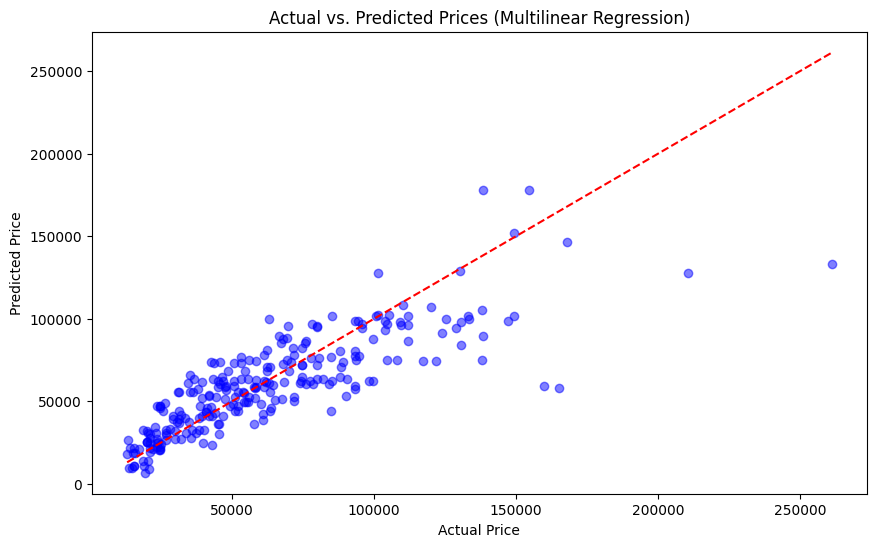

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "C:\\Users\\dell\\OneDrive\\Desktop\\laptop_clean.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(columns=["Unnamed:_0.1", "Unnamed:_0"], inplace=True, errors='ignore')

# Convert Ram to numeric
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

# Extract CPU brand and speed
df["Cpu_Brand"] = df["Cpu"].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")
df["Cpu_Speed"] = df["Cpu"].apply(lambda x: float(x.split()[-1][:-3]) if isinstance(x, str) and x.split()[-1][-3:] == "GHz" else np.nan)

# Extract GPU brand
df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")

# One-hot encoding for categorical features
encoder = OneHotEncoder(drop="first", sparse_output =False)
encoded_features = encoder.fit_transform(df[["Company", "TypeName", "Cpu_Brand", "Gpu_Brand", "OpSys"]])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Final dataset for modeling
X = pd.concat([df[["Ram", "Cpu_Speed"]], encoded_df], axis=1)
y = df["Price"]

# Handle missing values in Cpu_Speed (replace NaN with median)
X["Cpu_Speed"].fillna(X["Cpu_Speed"].median(), inplace=False)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multilinear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Visualization: Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Multilinear Regression)")
plt.show()